# AOS: develop FITS thresholding task

**Context**: the DM-26836 (the new repackager) needs test files, and to reduce file size we need a task that would take a FITS file, and reduce the information content.
    
**Outline**:

- take a file pattern as an input (eg. *.fits)
- args:
    - threshold  (by default couuld be the value from the FITS header that contain 'BIAS' ~ 1000, or take 'SEED' + 3 * 'GAIN' . There is also 'RDNOISE', ~2.7,  which is the readout noise (ADU/pixel) . So could do threshold = 1000 + 3 * RDNOISE ...
    - notBinary  ( by default False; if True, then values above threshold are set to 1, and below are set to 0)
     
    - if notBinary:
        subtractThreshold (by default False, if True, set keepOriginalValue = False; 
                           all px < thresh are set to  0,  all px > thresh are set to px - thresh )
        keepOriginalValue (by default True, if False, fall to subtractThreshold = True; 
                           all px < thresh are set to 0, all px > thresh are kept at original value
- returns:
    - thresholded fits file(s), with the unchanged header structure 

In [ ]:
makeBinary = False  # then 


In [1]:
import astropy.io.fits as fits

In [2]:
import glob
import os
from collections import defaultdict



# list the amp files 

visit_dir = '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/'
prefix='lsst'
phosim_amp_files \
            = sorted(glob.glob(os.path.join(visit_dir, f'{prefix}_a_*')))
amp_files = defaultdict(list)
    
for item in phosim_amp_files:
    sensor_id = '_'.join(os.path.basename(item).split('_')[4:6])
    amp_files[sensor_id].append(item)

In [3]:
# choose one sensor 
sensor = 'R22_S00'
amp_files[sensor]

['/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C00_E000.fits.gz',
 '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C01_E000.fits.gz',
 '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C02_E000.fits.gz',
 '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C03_E000.fits.gz',
 '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C04_E000.fits.gz',
 '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C05_E000.fits.gz',
 '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C06_E000.fits.gz',
 '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C07_E000.fits.gz',
 '/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S00_C1

In [4]:
# read one amp file 
hdul = fits.open(amp_files[sensor][0])


In [5]:
hdul.close()

In [2]:
hdul = fits.open('/project/scichris/repackagerTest/extraRpkgdAmp/MC_H_20000217_000032_R22_S00.fits')

_StoreAction(option_strings=['--keepOriginalValue', '-kov'], dest='keepOriginalValue', nargs=None, const=None, default=True, type=None, choices=None, help=None, metavar=None)

Namespace(filename=['a.fits', 'b.fits'], keepOriginalValue=True, notBinary=False, threshold=[1000.0])

Accepting wildcard should be what eg. ingest.py does :  https://github.com/lsst/pipe_tasks/blob/master/python/lsst/pipe/tasks/ingest.py 


In [23]:
fileNameList = ['*.fits']
expandFiles(fileNameList)

['R01_S10_g.fits',
 'MC_H_20000217_000032_R00_SW1.fits',
 'R22_S12_g.fits',
 'R01_S11_g.fits',
 'R01_S12_g.fits',
 'R01_S01_g.fits',
 'R01_S02_g.fits',
 'R01_S22_g.fits',
 'R00_SW0_g.fits',
 'R01_S21_g.fits',
 'R01_S20_g.fits',
 'R01_S00_g.fits',
 'R00_SW1_g.fits']

In [18]:
# Next, need to implament 

ImportError: cannot import name 'fits' from 'astropy' (/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/astropy/__init__.py)

In [24]:
#https://github.com/lsst/pipe_base
# from lsst.pipe.base import Task, InputOnlyArgumentParser

# way too complicated to use in practice ... 

In [26]:
#Task??

Below, the structure of makeGainImages.py for reference : 

In [149]:
from datetime import datetime
import argparse
import numpy as np
from glob import glob



#def main(just_wfs=False, detector_list=None):
    #()
            
            

def expandFiles(fileNameList):
    """Expand a set of filenames and globs, returning a list of filenames
    
    Parameters
    ------------
    fileNameList:  A list of files and glob patterns
    
    Returns:
    -----------
    expandedList : An expanded list of files that exist and files that fit the glob pattern 
    """
    expandedList = []
    for globPattern in fileNameList:
        files = glob(globPattern)

        if not files:
            print("%s doesn't match any file" % globPattern)
            continue

        expandedList.extend(files)

    return expandedList


#args = parser.parse_args()



#if __name__ == "__main__":
parser = argparse.ArgumentParser(description='Threshold FITS image filesto reduce file size')
parser.add_argument('filename', nargs='+', help='file(s) to threshold. Accept explicit filenames, \
eg. a.fits b.fits c.fits, or a glob pattern, eg *.fits') # nargs='+' requires 1 or more filenames...
# although I don't know how to program a wildcard yet ... 

parser.add_argument('--threshold', '-t', nargs=1, type=float)

parser.add_argument('--notBinary', '-nb', action='store_true', 
                    help='By default we make a binary image (by default pixels \
                    below threshold set to 0, and above threshold set to 1). Set this flag to do\
                    otherwise. If --notBinary flag is used, then either --keepOriginalValue, \
                    or --subtractThreshold must be set also.',
                    default=False)

parser.add_argument('--subtractThreshold', '-sub', action='store_true', default=False)
parser.add_argument('--keepOriginalValue', '-keep',  action='store_true', default=False)




#main(filename=args.filename, threshold = args.threshold, notBinary=args.notBinary, 
#subtractThreshold=args.subtractThreshold, keepOriginalValue=args.keepOriginalValue
#    )


if notBinary: subtractThreshold (by default False, if True, set keepOriginalValue = False;

                 all px < thresh are set to  0,  all px > thresh are set to px - thresh )
keepOriginalValue (by default True, if False, fall to subtractThreshold = True;

                 all px < thresh are set to 0, all px > thresh are kept at original value
returns:

In [1]:
os.chdir('/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/')

NameError: name 'os' is not defined

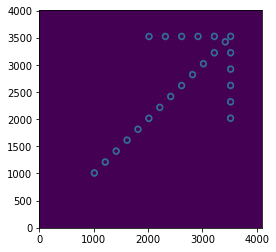

In [322]:
hdul = fits.open('lsst_e_9006001_f1_R22_S22_E000.fits.gz')
plt.imshow(hdul[0].data.T, origin='lower')

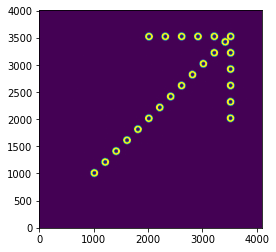

In [321]:
hdul = fits.open('thresholded/lsst_e_9006001_f1_R22_S22_E000.fits.gz')
plt.imshow(hdul[0].data.T, origin='lower')

In [226]:
# test argparser...
args = parser.parse_args(['lsst_a_9006001_f1_R22_S22*', ])
#args = parser.parse_args()


filename=args.filename
threshold = args.threshold
notBinary=args.notBinary
subtractThreshold=args.subtractThreshold
keepOriginalValue=args.keepOriginalValue

print('Filename:', filename)
print('Threshold:', threshold)
print('not binary', notBinary)
print('subtract threshold', subtractThreshold)
print('keep original value', keepOriginalValue)

if (subtractThreshold is True) and (keepOriginalValue is True):
    raise RuntimeError("--subtractThreshold and --keepOriginalValue are mutually exclusive.")
    
# choose binary mode 
if (notBinary is False):
    print('\nMaking a binary image: \
    px < thresh are set to 0,  \
    px > thresh are set to 1.')

# choose non-binary mode: select what to do with pixels above the
# threshold 
elif (notBinary is True):
    print('\nMaking a not-binary image:')
    if (subtractThreshold is True):
        print('subtract-threshold mode, i.e. ')
        print('px < thresh are set to  0, \
        \npx > thresh are set to px - thresh ')

    if (keepOriginalValue is True):
        print('keep original value mode, i.e.')
        print(' all px < thresh are set to 0, all px > thresh are kept at original value')

# in both binary and non-binary mode 
if threshold is None : 
    print('\nThreshold is not provided; using by default \
    threshold =  "SEED" + 3 * "GAIN" from the header .')
    

fits_files =  expandFiles(filename)
print(fits_files)

Filename: ['lsst_a_9006001_f1_R22_S22*']
Threshold: None
not binary False
subtract threshold False
keep original value False

Making a binary image:     px < thresh are set to 0,      px > thresh are set to 1.

Threshold is not provided; using by default     threshold =  "SEED" + 3 * "GAIN" from the header .
['lsst_a_9006001_f1_R22_S22_C04_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C01_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C14_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C02_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C07_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C15_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C12_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C13_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C05_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C11_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C16_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C03_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C17_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C00_E000.fits.gz', 'lsst_a_9006001_f1_R22_S22_C10_E000.fits.gz',

In [244]:
os.stat(fits_file).st_size

1244165

In [245]:
os.path.getsize(fits_file)

1244165

In [250]:
1024*1024  # to KB  

1048576

In [262]:
def get_size(filepath):
    """Convenience function to return the filesize. 
    It returns the human-readable string
    """
    size_bytes = os.path.getsize(filepath)
    if size_bytes < (1024*1024):
        size = str(round(size_bytes/1024)) + 'K'
    else:
        size = str(round((size_bytes/(1024*1024)),1)) + 'M'
    return size

In [265]:
get_size('lsst_a_9006001_f1_R22_S22_C02_E000.fits.gz')

'1.4M'

In [236]:



out_dir = None
if out_dir is None:
    print('Saving thresholded files in ')
    out_dir = os.path.join(os.getcwd(),'thresholded')
    print(out_dir)
    
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)
    
#for fits_file in fits_files:
#    threshold_file(fits_file, )
fits_file  =  fits_files[2]

Saving thresholded files in 
/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/thresholded


In [266]:
#threshold_file(fits_file, threshold, notBinary, subtractThreshold, keepOriginalValue)
# the actual thresholding function 
print('Thresholding %s'%fits_file)


hdul = fits.open(fits_file)
for i in range(len(hdul)):
    raw_data = hdul[i].data[:] 
    thresh_data = raw_data.copy()

    threshold=None #### 

    if threshold is None:
        gain = hdul[0].header['GAIN']
        seed = hdul[0].header['SEED']
        threshold = seed + 3*  gain
        print('SEED=%.2f, GAIN=%f'%(seed,gain))
        print('threshold = %.2f + 3*%f = %f'%(seed,gain,threshold))

    # select data below threshold
    below_thresh = raw_data < threshold

    # the data below threshold is always set to 0
    thresh_data[below_thresh] = 0 

    # the data above the threshold: 
    if notBinary:
        # subtract the threshold value 
        if subtractThreshold:
            print('subtracting threshold')
            thresh_data[~below_thresh] = raw_data[~below_thresh]-threshold

        # do nothing  
        if keepOriginalValue:
            print('keeping original value ')
            pass

    else:
        # binary mode: set to 1 
        print('setting to 1 ')
        thresh_data[~below_thresh] = 1 

    # replace the raw data with thresholded data 
    hdul[i].data[:] = thresh_data

# save the fits file 
out_file = os.path.join(out_dir, fits_file)
hdul.writeto(out_file, overwrite=True)

old_size = get_size(fits_file)
new_size = get_size(out_file)
print('The filesize has been reduced from %s to %s'%(old_size, new_size))

Thresholding lsst_a_9006001_f1_R22_S22_C14_E000.fits.gz
SEED=1000.00, GAIN=1.105710
threshold = 1000.00 + 3*1.105710 = 1003.317130
setting to 1 
The filesize has been reduced from 1.2M to 172K


In [223]:
hdul.writeto()

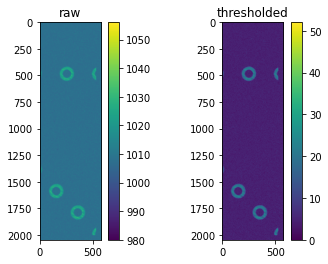

In [222]:
# sanity check... show the raw and thresholded image 
fig,ax = plt.subplots(1,2,)
image=ax[0].imshow(raw_data)
ax[0].set_title('raw')
plt.colorbar(mappable=image, ax=ax[0])
image=ax[1].imshow(thresh_data)
ax[1].set_title('thresholded')
plt.colorbar(mappable=image, ax=ax[1])writeto

In [209]:
thresh_data

array([[1, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 0, 1]], dtype=uint32)

In [307]:
# make a minimal file:  some header, some data.

hdul = fits.open('lsst_a_9006001_f1_R22_S22_C14_E000.fits.gz')


raw_data = hdul[0].data[:]
hdul[0].data =  raw_data[400:600,150:350]

hdul.writeto('minimal_lsst_a_9006001_f1_R22_S22_C14_E000.fits.gz')

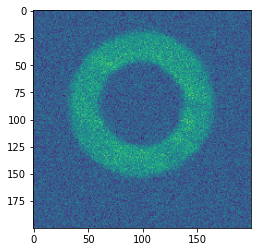

In [305]:
plt.imshow(hdul[0].data)#[400:600,150:350])

In [272]:
# for test could use one of the e-image files ... need only two:
# one for main raft,  one for corner raft 

hdul_0 = fits.open(fits_file)
hdul_1 = fits.open(out_file)


# unit_test  : 

# check that before there are no files in 'thresholded', and afterwards there is one 

# check that the length of header before is the same as after 
for i in range(len(hdul_0)):
    assert len(hdul_0[i].header) == len(hdul_1[i].header)

# if binary (by default), check that in the thresholded file the only values are 0 and 1 
#if not notBinary:
#    for i in range(len(hdul_0)):
#        assert 

# if subtract_threshold, check that in the thresholded file there are no values above threshold 

# if keep_original, check that the values above threshold are the same as in the original file ... 



In [273]:
import unittest

In [279]:
from lsst.utils import getPackageDir


In [310]:
#unittest.TestCase?

(array([4.80000e+01, 8.61800e+03, 1.54284e+05, 6.22150e+05, 3.29617e+05,
        5.22460e+04, 1.03630e+04, 2.06500e+03, 2.49000e+02, 8.00000e+00]),
 array([ 980. ,  987.6,  995.2, 1002.8, 1010.4, 1018. , 1025.6, 1033.2,
        1040.8, 1048.4, 1056. ]),
 <BarContainer object of 10 artists>)

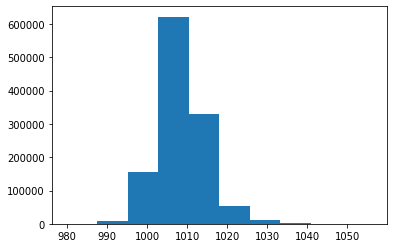

In [165]:
import matplotlib.pyplot as plt 
plt.hist(np.ravel(hdul[0].data))

In [148]:
np.median(np.ravel(hdul[0].data))

0.0

# Can thresholded files be ISRd correctly  ? 

There are thresholded files in `/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/thresholded`,
 but those are binary.
 
Check which gain values were used : 

In [1]:
from astropy.io import fits

# check the files that I thresholded last time - 
# which values of gain did they use ? 
hdul = fits.open('/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/lsst_a_9006001_f1_R22_S12_C00_E000.fits.gz')

# check the value in the image header that phosim used ...
print(hdul[0].header['GAIN'])

# check the value that will be used by makeCalibs to make calibration files - must be the same ....
from lsst.obs.lsst import LsstCam
camera = LsstCam().getCamera()
detector = camera['R22_S12']
amp = detector['C00']
print(amp.getGain())

1.11329
1.13693


Ok, they're different from the ticket branch of obs_lsst, i.e. they used the master branch values. 



In [7]:
hdul = fits.open('/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/\
thresholded_repackaged/MC_H_20000217_006001_R22_S12.fits')

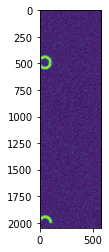

In [14]:
plt.imshow(hdul[4].data)

The histogram shows that we did subtract the threshold properly : 

(array([1049271.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  130377.]),
 array([   0. ,  103.7,  207.4,  311.1,  414.8,  518.5,  622.2,  725.9,
         829.6,  933.3, 1037. ]),
 <BarContainer object of 10 artists>)

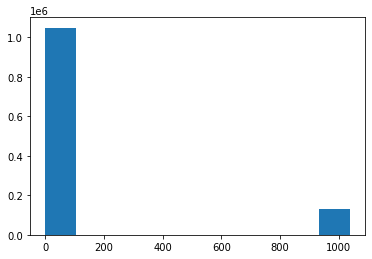

In [16]:
import numpy as np 
plt.hist(np.ravel(hdul[4].data))

See - whatever is below the threshold is set identically to 0 : 

In [17]:
hdul[4].data

array([[   0,    0,    0, ..., 1005,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0, 1007, ...,    0,    0,    0],
       [1004,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint32)

Show the postISR image: 

In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import lsst.daf.persistence as dafPersist
dataRoot='/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/input_2021_08_thresh/'
repoRoot = os.path.join(dataRoot, 'rerun/run1') 
postISRbutler = dafPersist.Butler(repoRoot, )
dataId = dict(run='9006001', visit=4000021706001, raftName='R22', detectorName='S12')
post = postISRbutler.get('postISRCCD', **dataId) 
image = post.image.array


/project/scichris/dev/obs_lsst/python/lsst/obs/lsst/lsstCamMapper.py:157: FutureWarning: Replaced by FilterLabel. Will be removed after v22.
  for n in afwImage.Filter.getNames():
/project/scichris/dev/obs_lsst/python/lsst/obs/lsst/lsstCamMapper.py:157: FutureWarning: Replaced by FilterLabel. Will be removed after v22.
  for n in afwImage.Filter.getNames():


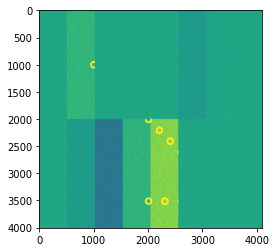

In [4]:
plt.imshow(image,vmax=800)

Ok, as I thought, the ISR won't work since the noise level is different than that provided by the flat image ... 

Do the same for un-thresholded images to show that if we use calibs and actual raws, it works fine : 
    
    
    makeGainImages.py --detector_list R22_S12
    
    
    Make an input dir :
    
    mkdir input_2021_08_orig

Ingest calibs :
    
     ingestCalibs.py /project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/input_2021_08_orig /project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/R22_S12_g.fits --validity 99999 --output /project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/input_2021_08_orig
    
Ingest raws: 

     ingestImages.py /project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/input_2021_08_orig /project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/repackaged/MC_H_20000217_006001_R22_S12.fits
     
     
Run the ISR on thresholded and then repackaged images : 
( cp the isr_config.py file ! ) 


    runIsr.py  /project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/input_2021_08_orig/   --id  --rerun=run1  --configfile /project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/input_2021_08_orig/isr_config.py  --no-versions

In [5]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import lsst.daf.persistence as dafPersist
dataRoot='/project/scichris/aos/segmentation_update/comcam/arrowsUpdSerial2/input_2021_08_orig/'
repoRoot = os.path.join(dataRoot, 'rerun/run1') 
postISRbutler = dafPersist.Butler(repoRoot, )
dataId = dict(run='9006001', visit=4000021706001, raftName='R22', detectorName='S12')
post = postISRbutler.get('postISRCCD', **dataId) 
image = post.image.array


/project/scichris/dev/obs_lsst/python/lsst/obs/lsst/lsstCamMapper.py:157: FutureWarning: Replaced by FilterLabel. Will be removed after v22.
  for n in afwImage.Filter.getNames():
/project/scichris/dev/obs_lsst/python/lsst/obs/lsst/lsstCamMapper.py:157: FutureWarning: Replaced by FilterLabel. Will be removed after v22.
  for n in afwImage.Filter.getNames():


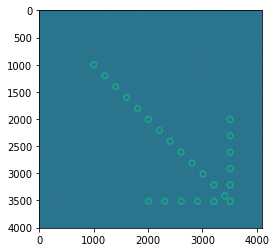

In [6]:
plt.imshow(image)

Ok, so for ISR tests etc can't use thresholded FITS file (unless we set not to use the flats, but that defeats the whole purpose... )